# Aula 2 - Modelos de IA & ML

##Exercício de fixação III / desafio I - Regressão Linear e Árvore de Decisão

Nosso primeiro exercício é uma regressão linear simples, analisando peso, altura e sexo de 200 pessoas:

In [183]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
%matplotlib inline
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

Vamos começar lendo os dados do arquivo .csv denominado "weights.csv":

In [2]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

ModuleNotFoundError: No module named 'google'

In [14]:
pesos = pd.read_csv('weights.csv', sep=';')

Agora vamos performar alguns passos de análise exploratória, uma das bases da análise em Ciência de Dados e que também nos prepara para o termos um melhor funcionamento e entendimento quanto a nossos algoritmos de IA. O primeiro passo é verificar uma parte (5 primeiros registros) que compõem nosso dataframe:

In [15]:
pesos.head()

,sex,weight,height
0,M,77,182
1,F,58,161
2,F,53,161
3,M,68,177
4,F,59,157


Agora, a partir do describe do Python, também podemos ter acesso a informações tais como quantidade geral de itens de dados, média, média ponderada, máximo e mínimo bem como nossos primeiro, segundo e terceiro quartis, 25%, 50% e 75%:

In [16]:
pesos.describe()

,weight,height
count,200.000000,200.00000
mean,65.770000,170.46500
std,14.899567,9.09408
min,39.000000,146.00000
25%,55.000000,164.00000
50%,63.000000,169.50000
75%,74.000000,177.25000
max,160.000000,197.00000


A partir do exposto, também podemos verificar valores específicos a partir de características específicas tal como verificar qual o máximo da característica (atributo) peso (weight) para o atributo sexo (sex) se constar como feminino (F). Exemplo:

In [17]:
pesos.loc[pesos.sex=='F']['weight'].max()

160

In [18]:
pesos['sex'].value_counts()

F    112
M     88
Name: sex, dtype: int64

Para ter mais possibilidades de análise de nossos dados uma boa prática é verificar nossos histogramas a partir de nosso dataframe. O modo mais simples de se fazer um histograma é do seguinte modo:

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001FE1F0919E8>,
      dtype=object)

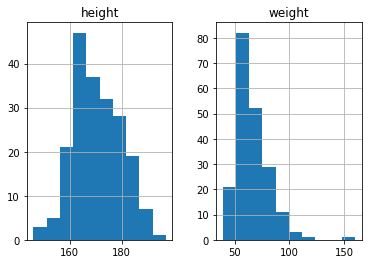

In [19]:
pesos.hist()

In [20]:
pesos.dtypes

sex       object
weight     int64
height     int64
dtype: object

In [21]:
pesos.shape

(200, 3)

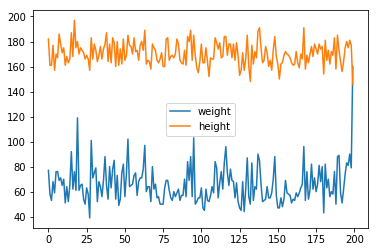

In [22]:
pesos.plot()

A fim de obtermos mais detalhes sobre os dados numéricos, podemos usar o método describe() novamente:

In [23]:
pesos.describe()

,weight,height
count,200.000000,200.00000
mean,65.770000,170.46500
std,14.899567,9.09408
min,39.000000,146.00000
25%,55.000000,164.00000
50%,63.000000,169.50000
75%,74.000000,177.25000
max,160.000000,197.00000


Com isso, obtemos o número de exemplos, a média de cada atributo, desvio padrão, valor mínimo, primeiro, segundo e terceiro quartil e valor máximo do atributo, respectivamente.

Para valores discretos podemos usar o método value_counts()

In [24]:
pesos.sex.value_counts()

F    112
M     88
Name: sex, dtype: int64

Logo, temos que nesta base temos 112 pessoas do sexo feminino e 88 do sexo masculino.

Vamos visualizar esses dados graficamente:

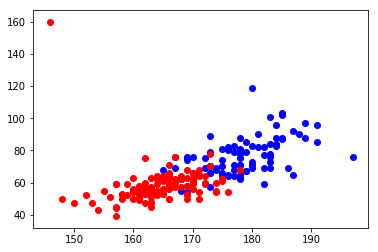

In [25]:
plt.scatter(x=pesos.loc[pesos.sex=='M', 'height'], 
            y=pesos.loc[pesos.sex=='M', 'weight'], c='blue')
plt.scatter(x=pesos.loc[pesos.sex=='F', 'height'], 
            y=pesos.loc[pesos.sex=='F', 'weight'], c='red')

Aqui encontramos um problema. 

Existem alguns pontos muito fora da distribuição de dados (160, 120); esses pontos são nossos outliers. 

Eles podem prejudicar o modelo, porque forçarão a reta para próximo deles. 

Iremos então removê-los.

<br>Veja também que os pesos das pessoas de sexo masculino estão deslocados para a direita, o que indica uma tendência de homens serem mais pesados que as mulheres. Nosso modelo nos mostrará isso.

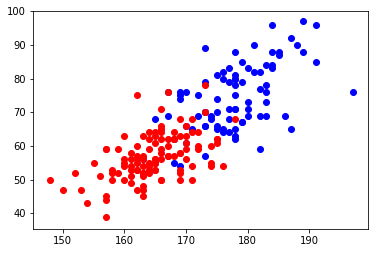

In [26]:
pesos = pesos[pesos.weight <= 100]
plt.scatter(x=pesos.loc[pesos.sex=='M', 'height'], 
            y=pesos.loc[pesos.sex=='M', 'weight'], c='blue')
plt.scatter(x=pesos.loc[pesos.sex=='F', 'height'], 
            y=pesos.loc[pesos.sex=='F', 'weight'], c='red')

Como visto em aula, para o caso de variáveis categóricas devemos utilizar "dummy variables". O método get_dummies do pandas cuida disso. Teremos um valor binário onde 1 corresponde a masculino e 0 a feminino

In [27]:
pesos.head()

,sex,weight,height
0,M,77,182
1,F,58,161
2,F,53,161
3,M,68,177
4,F,59,157


In [28]:
dummies_sex = pd.get_dummies(pesos.sex, drop_first=True)
dummies_sex.head()

,M
0,1
1,0
2,0
3,1
4,0


Anexamos as novas colunas à nossa base de dados. 

Axis = 1 neste caso indica que queremos anexar colunas (usar 0 para linhas).

In [29]:
pesos = pd.concat([pesos, dummies_sex], axis=1)
pesos.head()

,sex,weight,height,M
0,M,77,182,1
1,F,58,161,0
2,F,53,161,0
3,M,68,177,1
4,F,59,157,0


Agora que tratamos os dados, podemos aplicar o método de regressão linear. Para isso especificamos qual será nossa variável dependente (y) e as variáveis independetes (X), ou atributos.

---



In [30]:
X_train,X_test,y_train,y_test = train_test_split(
    pesos[['M', 'height']], 
    pesos.weight, 
    test_size = 0.3, 
    random_state = 42
)

In [31]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train.ravel())

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [32]:
y_train_pred = lin_reg.predict(X_test)

In [33]:
mean_squared_error(y_test,y_train_pred)

49.742236001096664

Podemos visualizar os coeficientes da reta:

In [34]:
lin_reg.coef_

array([7.51055948, 0.7106796 ])

In [35]:
lin_reg.intercept_

-59.83415852479902

Vamos agora plotar nossa função. Observe que como temos uma variável categórica que possui dois valores, nossa reta se comporta de forma diferente para cada sexo. Desta forma vamos plotar uma reta para cada sexo.

In [36]:
heights = np.linspace(140, 210, 70)
sex_masc = np.ones(70)
sex_fem = np.zeros(70)

coef_sex = float(lin_reg.coef_[0])
coef_height = float(lin_reg.coef_[1])
intercept = float(lin_reg.intercept_)

reta_masc = coef_sex*sex_masc + coef_height*heights + intercept
reta_fem = coef_sex*sex_fem + coef_height*heights + intercept

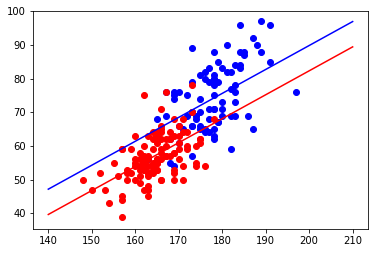

In [37]:
plt.scatter(x=pesos.loc[pesos.sex=='M', 'height'], 
            y=pesos.loc[pesos.sex=='M', 'weight'], c='blue')
plt.scatter(x=pesos.loc[pesos.sex=='F', 'height'], 
            y=pesos.loc[pesos.sex=='F', 'weight'], c='red')
plt.plot(heights, reta_masc, '-', c='blue')
plt.plot(heights, reta_fem, '-', c='red')
plt.show()

# Desafio 1 - De acordo com o que vimos na aula, faça as corretas modificações para que possamos fazer predições diversas. Favor fazer um exemplo para cada caso a seguir:

[Exemplo a ser corrigido] Prevendo o peso de um homem de 1,73 metros

In [38]:
lin_reg.predict([[1, 173]])

array([70.62397182])

## Bonus) Faça as corretas modificações para que possamos fazer as predições também por meio de árvore de decisão.

In [39]:
arvore = DecisionTreeClassifier(random_state=42)
arvore.fit(X_train, y_train)
arvore.score(X_train, y_train)

0.40441176470588236

Prevendo o peso de um homem de 1,73 metros com Arvore

In [40]:
arvore.predict([[1, 173]])

array([70], dtype=int64)

## I) Prever o peso de um homem de X quilos, de acordo com sua altura.

Prevendo o peso de um homem de 1,80 metros

In [41]:
lin_reg.predict([[1, 180]])

array([75.59872903])

## II) Prever o peso de uma mulher de X quilos, de acordo com sua altura.

Prevendo o peso de uma mulher de 1,65 metros

In [42]:
lin_reg.predict([[0, 165]])

array([57.42797554])

## III) Prever a altura de um homem de X metros, de acordo com seu peso.

Para prever a altura, um novo modelo deve ser treinado !

In [43]:
X_train,X_test,y_train,y_test = train_test_split(
    pesos[['M', 'weight']], 
    pesos.height, 
    test_size = 0.3, 
    random_state = 42 
)

In [44]:
lin_reg_m = LinearRegression()
lin_reg_m.fit(X_train, y_train.ravel())

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [45]:
y_train_pred = lin_reg_m.predict(X_test)

In [46]:
mean_squared_error(y_test,y_train_pred)

31.054555854914987

In [47]:
lin_reg_m.coef_

array([8.30462913, 0.35119028])

In [48]:
lin_reg_m.intercept_

144.3408401151279

Prevendo a altura de um Homem com 80kg

In [49]:
lin_reg_m.predict([[1, 80]])

array([180.74069163])

## IV) Prever a altura de uma mulher de X metros, de acordo com seu peso.

Prevendo a altura de uma mulher com 65kg

In [50]:
lin_reg_m.predict([[0, 65]])

array([167.1682083])

##Exercício de fixação IV / desafio II - Regressão Linear e Árvore de Decisão

<h4> Agora vamos analisar um exemplo mais complexo, envolvendo mais variáveis </h4>

Neste exercício vamos prever o valor mediano de uma casa na redondeza de Boston dados determinados atributos. Para isso utilizamos a base de dados 'boston.csv'

In [51]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

ModuleNotFoundError: No module named 'google'

In [255]:
data = pd.read_csv('boston.csv', sep=';', decimal=',')

Vamos analisar as 5 primeiras linhas dos nossos dados com o método head() 

In [256]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PT,B,LSTAT,MV
0,0.00632,18.0,2.31,0,0.538,6.575,65.199997,4.0900,1,296,15.300000,396.899994,4.98,24.000000
1,0.02731,0.0,7.07,0,0.469,6.421,78.900002,4.9671,2,242,17.799999,396.899994,9.14,21.600000
2,0.02729,0.0,7.07,0,0.469,7.185,61.099998,4.9671,2,242,17.799999,392.829987,4.03,34.700001
3,0.03237,0.0,2.18,0,0.458,6.998,45.799999,6.0622,3,222,18.700001,394.630005,2.94,33.400002
4,0.06905,0.0,2.18,0,0.458,7.147,54.200001,6.0622,3,222,18.700001,396.899994,5.33,36.200001


De acordo com nosso conjunto de dados, temos então 14 colunas:<br>
    <b>CRIM</b>: taxa de crimes per capta na cidade <br>
    <b>ZN</b>: proporção de terrenos residenciais zoneada para lotes acima de 25.000<br>
    <b>INDUS</b>: proporção de zonas de negócios não varejistas na cidade<br>
    <b>CHAS</b>: proximidade ao rio Carles 1 se próximo, 0 se não<br>
    <b>NOX</b>: concentração de oxido nitrico (ppm)<br>
    <b>RM</b>: número médio de cômodos por residência<br>
    <b>AGE</b>: proporção de unidades ocupadas pelo proprietário construídas antes de 1940<br>
    <b>DIS</b>: distância ponderada aos 5 centros financeiros de Boston<br>
    <b>RAD</b>: índice de acessibilidade às rodoviais <br>
    <b>TAX</b>: taxa de imposto predial de valor integral por USS 10.000 <br>
    <b>PT</b>: relação aluno-professor por cidade<br>
    <b>B</b>: 1000 (Bk − 0,63) 2 onde Bk é a proporção de negros por cidade<br>
    <b>LSTAT</b>: menor status da população <br>
    <b>MV</b>: Valor mediano de casas ocupadas pelo proprietário em USS 1000s

A fim de obtermos mais detalhes sobre os dados numéricos, podemos usar o método describe():

In [257]:
data['MV'].describe()

count    506.000000
mean      22.532806
std        9.197104
min        5.000000
25%       17.025000
50%       21.200001
75%       25.000000
max       50.000000
Name: MV, dtype: float64

Podemos visualizar a distribuição dos dados por meio de um histograma:

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001FE2244B860>,
      dtype=object)

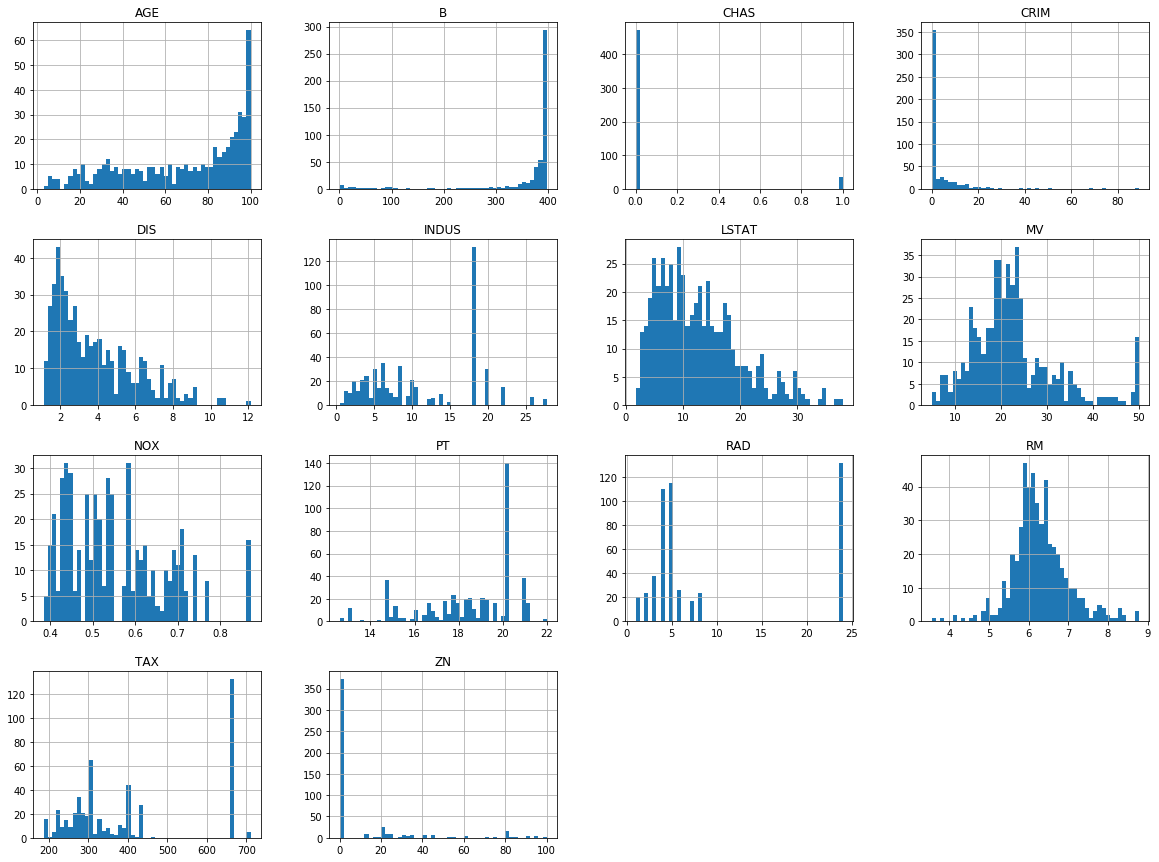

In [258]:
data.hist(bins=50, figsize=(20,15))

Agora que conhecemos os dados, podemos aplicar o método de regressão linear. Para isso especificamos qual será nossa varável dependente (y) e as variáveis independetes (X), ou atributos.

In [259]:
y = data['MV']
X = data.drop('MV', axis=1)

In [260]:
lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Agora que temos um modelo treinado, podemos prever o valor de um novo exemplo:

In [261]:
x_new = [[0.02731, 0.0, 7.07, 0, 0.469, 6.421, 
          78.900002, 4.9671, 2, 242, 17.799999, 396.899994, 9.14]]

In [262]:
lin_reg.predict(x_new)

array([25.02556341])

Também podemos prever uma lista de valores de uma única vez:

In [263]:
X_new = [[0.02731, 0.0, 7.07, 0, 0.469, 6.421, 78.900002, 4.9671, 2, 
          242, 17.799999, 396.899994, 9.14],
         [0.67671, 0.8, 5.56, 0, 0.567, 3.132, 60.678976, 2.3465, 3, 
          432,  9.546666, 342.435664, 3.23], 
         [0.05641, 0.0, 1.04, 1, 0.232, 4.322, 67.564646, 1.5678, 5, 
          567, 15.898006, 224.655678, 5.84]]

In [264]:
lin_reg.predict(X_new)

array([25.02556341, 22.96398145, 27.65635662])

Também é possível visualizarmos os coeficientes da reta para cada atributo

In [265]:
lin_reg.coef_

array([-1.08011353e-01,  4.64204559e-02,  2.05586761e-02,  2.68673389e+00,
       -1.77666149e+01,  3.80986498e+00,  6.92223926e-04, -1.47556679e+00,
        3.06049515e-01, -1.23345932e-02, -9.52747256e-01,  9.31168341e-03,
       -5.24758397e-01])

e o valor do bias:

In [266]:
lin_reg.intercept_

36.459491457833586

Também podemos calcular o erro médio quadrado (MSE) do nosso modelo durante o treinamento

In [267]:
mean_squared_error(lin_reg.predict(X), y)

21.894831188831233

## Desafio 2 - Agora que vimos mais um exemplo de uso de regressão linear, você consegue adaptar o exposto para uso de uma técnica de árvore de decisão, como visto no exemplo anterior?

Para adaptar, será necessario a criação de uma classificação no 'MV'. <br>
Neste Caso, criei categorias baseado nos quartis dos valores de 'MV' para representar um Valor baixo, Médio e alto. <br>

Valor Medio abaixo de 17 = 1 (Baixo) <br>
Valor Médio Entre 17 e 25 = 2 (Médio) <br>
Maior que 25 = 3 (Alto) <br>

In [268]:
ClassMV = []
for x in data['MV']:
    if (x <= 17):
        ClassMV.append(1)
    elif (x > 17 and x <= 25 ):
        ClassMV.append(2)
    elif (x > 25):
        ClassMV.append(3)

In [269]:
data['MV'] = ClassMV

In [270]:
data['MV'].value_counts()

2    255
1    127
3    124
Name: MV, dtype: int64

In [271]:
X_train,X_test,y_train,y_test = train_test_split(
    data.drop('MV', axis=1), 
    data['MV'], 
    test_size = 0.3, 
    random_state = 42
)

In [272]:
arvore = DecisionTreeClassifier(random_state=42)
arvore.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

In [273]:
y_pred = arvore.predict(X_test)

In [274]:
from sklearn.metrics import accuracy_score

print(accuracy_score(y_test, y_pred))

0.7960526315789473


In [275]:
x_new = [[0.02731, 0.0, 7.07, 0, 0.469, 6.421, 
          78.900002, 4.9671, 2, 242, 17.799999, 396.899994, 9.14]]
arvore.predict(x_new)

array([2], dtype=int64)

In [276]:
X_new = [[0.02731, 0.0, 7.07, 0, 0.469, 6.421, 78.900002, 4.9671, 2, 
          242, 17.799999, 396.899994, 9.14],
         [0.67671, 0.8, 5.56, 0, 0.567, 3.132, 60.678976, 2.3465, 3, 
          432,  9.546666, 342.435664, 3.23], 
         [0.05641, 0.0, 1.04, 1, 0.232, 4.322, 67.564646, 1.5678, 5, 
          567, 15.898006, 224.655678, 5.84]]
arvore.predict(X_new)

array([2, 1, 1], dtype=int64)